In [1]:
# required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from utilities import *

%matplotlib inline


# read the dataset
data = pd.read_csv('../data/iris.csv')

print('Column Names:', data.columns.tolist(), '\nShape:', data.shape)


rename_dict = {
    "variety":"Species"
}
data.rename(columns=rename_dict, inplace=True)

data.head()

Column Names: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety'] 
Shape: (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
# label encode the target variable
encode = LabelEncoder()
data.Species = encode.fit_transform(data.Species)


# train-test-split   
train , test = train_test_split(data,test_size=0.2,random_state=0)

print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)

data.head()

shape of training data :  (120, 5)
shape of testing data (30, 5)


,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# seperate the target and independent variable
train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

In [4]:
# create the object of the model
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

model.fit(train_x,train_y)

predict = model.predict(test_x)

print('Predicted Values on Test Data', encode.inverse_transform(predict))

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y, predict))

Predicted Values on Test Data ['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa']


Accuracy Score on test data : 


1.0


In [5]:
# def intitial_eda_checks(df):
#     '''
#     Takes df
#     Checks nulls
#     '''
#     if df.isnull().sum().sum() > 0:
#         mask_total = df.isnull().sum().sort_values(ascending=False) 
#         total = mask_total[mask_total > 0]

#         mask_percent = df.isnull().mean().sort_values(ascending=False) 
#         percent = mask_percent[mask_percent > 0] 

#         missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
#         print(f'Total and Percentage of NaN:\n {missing_data}')
#     else: 
#         print('No NaN found.')


intitial_eda_checks(data)

No NaN found.


In [6]:
# def view_columns_w_many_nans(df, missing_percent):
#     '''
#     Checks which columns have over specified percentage of missing values
#     Takes df, missing percentage
#     Returns columns as a list
#     '''
#     mask_percent = df.isnull().mean()
#     series = mask_percent[mask_percent > missing_percent]
#     columns = series.index.to_list()
#     return columns

view_columns_w_many_nans(data, 0.5)

[]

In [7]:
# def drop_columns_w_many_nans(df, missing_percent):
#     '''
#     Takes df, missing percentage
#     Drops the columns whose missing value is bigger than missing percentage
#     Returns df
#     '''
#     series = view_columns_w_many_nans(df, missing_percent=missing_percent)
#     if len(series) > 0:
#         list_of_cols = series.index.to_list()
#         df.drop(columns=list_of_cols, inplace=True)
#     print("Columns dropped:", series)
#     return df


drop_columns_w_many_nans(data, 0.5)

Columns dropped: []


,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


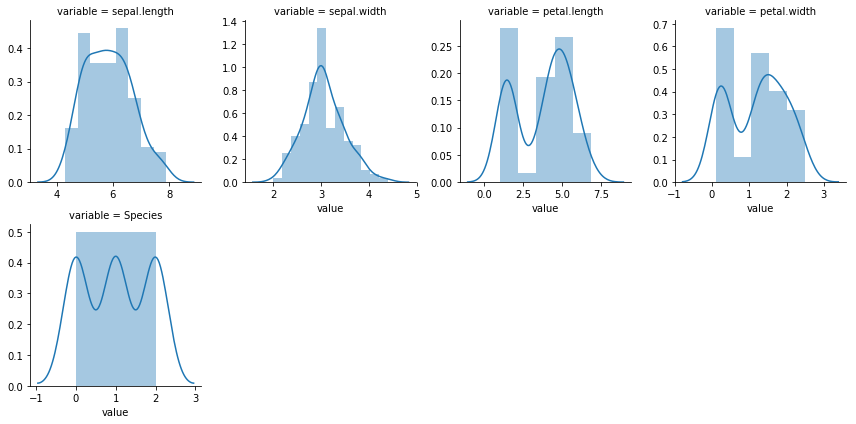

In [8]:
# def histograms_numeric_columns(df, numerical_columns=[]):
#     '''
#     Takes df, numerical columns as list
#     Returns a group of histagrams
#     '''
#     import seaborn as sns
#     if numerical_columns == []:
#         numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()
#     f = pd.melt(df, value_vars=numerical_columns) 
#     g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
#     g = g.map(sns.distplot, 'value')
#     return g


histograms_numeric_columns(data)

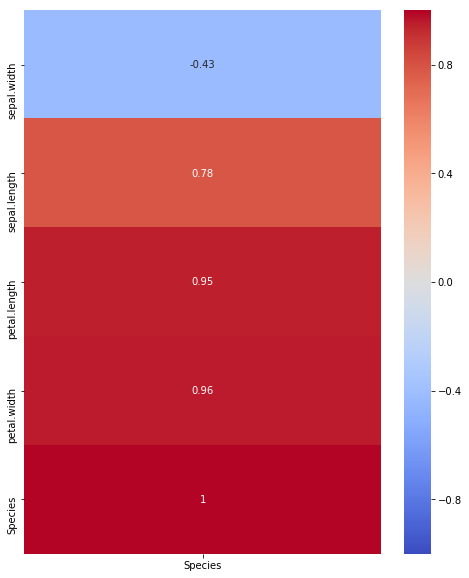

In [9]:
# def heatmap_numeric_w_dependent_variable(df, dependent_variable):
#     '''
#     Takes df, a dependant variable as str
#     Returns a heatmap of all independent variables' correlations with dependent variable 
#     '''
#     from matplotlib import pyplot as plt
#     import seaborn as sns
#     plt.figure(figsize=(8, 10))
#     g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
#                     annot=True, 
#                     cmap='coolwarm', 
#                     vmin=-1,
#                     vmax=1) 
#     return g


heatmap_numeric_w_dependent_variable(data, 'Species')

In [10]:
# def categorical_to_ordinal_transformer(categories):
#     '''
#     Returns a function that will map categories to ordinal values based on the
#     order of the list of `categories` given. Ex.

#     If categories is ['A', 'B', 'C'] then the transformer will map 
#     'A' -> 0, 'B' -> 1, 'C' -> 2.
#     '''
#     return lambda categorical_value: categories.index(categorical_value)

# def transform_categorical_to_numercial(df, categorical_numerical_mapping):
#     '''
#     Transforms categorical columns to numerical columns
#     Takes a df, a dictionary 
#     Returns df
#     '''
#     transformers = {k: categorical_to_ordinal_transformer(v) 
#                     for k, v in categorical_numerical_mapping.items()}
#     new_df = df.copy()
#     for col, transformer in transformers.items():
#         new_df[col] = new_df[col].map(transformer).astype('int64')
#     return new_df


# read the dataset
data = pd.read_csv('../data/iris.csv')

print('Column Names:', data.columns.tolist(), '\nShape:', data.shape)


rename_dict = {
    "variety":"Species"
}
data.rename(columns=rename_dict, inplace=True)

categorical_numerical_mapping = {
    'Species' : ['Setosa', 'Versicolor', 'Virginica']
}

transform_categorical_to_numercial(data, categorical_numerical_mapping)

Column Names: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety'] 
Shape: (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
